IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

LOAD THE DATASET

In [2]:
df=pd.read_csv('Walmart_Sales.csv')

INFORMATION ABOUT THE DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Define features and target

In [4]:
X=df.drop(columns=['Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

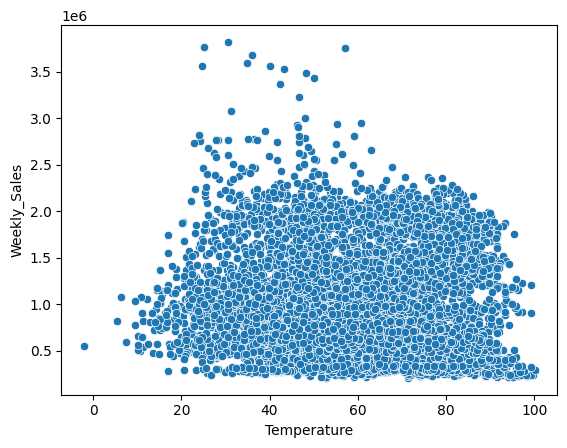

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales')

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

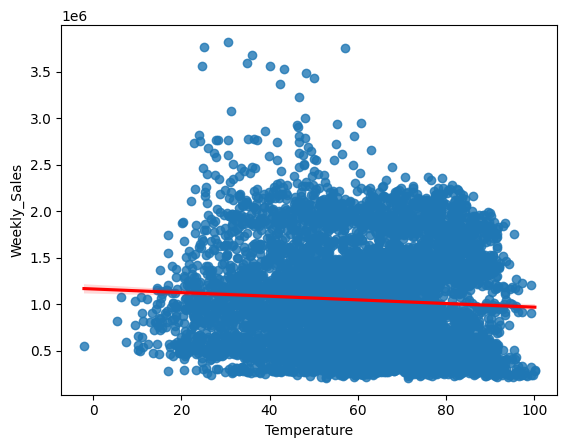

In [6]:
sns.regplot(data=df, x='Temperature', y='Weekly_Sales', scatter=True, line_kws={"color": "red"})

Split the data into training and testing sets

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=42)

Standardize the features

In [ ]:
stdscaler = StandardScaler()
xtrain_stdscaler = stdscaler.fit_transform(xtrain)
xtest_stdscaler = stdscaler.transform(xtest)

Generate polynomial features

In [ ]:
poly = PolynomialFeatures(degree=5)
xtrain_poly = poly.fit_transform(xtrain_stdscaler)
xtest_ploy = poly.transform(xtest_stdscaler)

Fit the Linear Regression model on polynomial features

In [ ]:
model = LinearRegression()
model.fit(xtrain_poly, ytrain)

Make predictions

In [ ]:
ypred = model.predict(xtest_ploy) 

Evaluate the model using R² score

In [ ]:
r2_score(ytest, ypred)

0.6000687965887972